In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [2]:
def noisy_sin(x, noise_factor):
    return np.sin(x)/noise_factor+np.random.normal(loc=0.0, scale=1.0, size=len(x))
    

In [3]:
xs = np.linspace(0,4*np.pi,500)

500


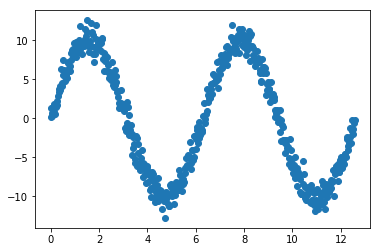

In [4]:

print(len(xs))
ys = noisy_sin(xs,0.1)
plt.scatter(xs,ys)

#### Check to see if the function is strictly monotonic

In [5]:
def is_strictly_monotonic(ys):
    d_ys = np.gradient(ys) # The derivative of ys
    min_d_ys = min(d_ys) 
    max_d_ys = max(d_ys)

    if min_d_ys * max_d_ys > 0: # if the max and min values of the slope have the same sign, (either both negative or both positive)
        return True # it's strictly monotonic
    return False # otherwise, its not

In [6]:
is_strictly_monotonic(ys)

False

In [7]:
d_ys = np.gradient(ys)
d2_ys = np.gradient(d_ys)
len(d2_ys)

500

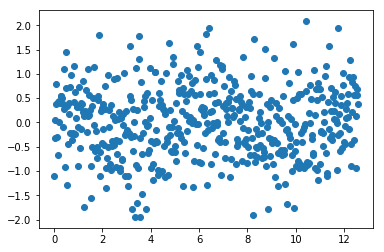

In [10]:
plt.scatter(xs,d_ys)

#### Case 1: if the function is NOT strictly monotonic

##### In this case, we find the minima, maxima and the points of inflection

In [36]:
min_max_xs = []
min_max_ys = []
if not is_strictly_monotonic(ys):
    for x, y, d_y, d2_y in zip(xs, ys, d_ys, d2_ys):
        
        if abs(d_y) < 0.1 or abs(d2_y) < 0.1: # 0.1 being the tolerance
            min_max_xs.append(x)
            min_max_ys.append(y)

In [37]:
min_max_ys

[0.6616847627700597,
 1.4499899771306692,
 2.2587389776125706,
 2.806813152972083,
 3.362490993898535,
 4.131188734561333,
 6.470636698731655,
 7.915438619042536,
 9.619307492626804,
 8.4707495550157,
 9.291322104793718,
 8.92881571884176,
 9.191770292627572,
 9.67146309125157,
 9.968452768389875,
 10.226823274453388,
 10.533849390133845,
 12.184622935804594,
 8.22701203881849,
 9.382915844295932,
 7.829289359760362,
 5.887916757286802,
 7.190004746208911,
 6.146204326218445,
 4.216270682247816,
 2.7932711512833444,
 1.6322718096300688,
 -0.5635470558922953,
 -1.5176670140386832,
 -4.005739150742879,
 -5.752170458988568,
 -7.564791815224115,
 -7.176416403018818,
 -6.444437319545701,
 -8.320766552333527,
 -9.463663557461919,
 -9.858565784986238,
 -12.748280578718461,
 -11.232104043922272,
 -8.780044434395943,
 -9.632645309901319,
 -7.006681780322559,
 -6.237555542282852,
 -5.998834965322971,
 -5.000455875326619,
 -4.684529156996575,
 -5.017694331882081,
 -3.0769618455739045,
 -5.3829933

In [38]:
min_max_xs

[0.05036621488721111,
 0.22664796699245,
 0.2770141818796611,
 0.30219728932326667,
 0.3273803967668722,
 0.3777466116540833,
 0.7554932233081666,
 0.9065918679698,
 0.9821411903006166,
 1.0828736200750388,
 1.13323983496225,
 1.2087891572930667,
 1.2591553721802777,
 1.3095215870674888,
 1.3598878019547,
 1.410254016841911,
 1.4606202317291221,
 1.6620850912779666,
 1.7376344136087833,
 1.9642823806012333,
 2.2916627773681055,
 2.4427614220297387,
 2.5183107443605555,
 2.6442262815785833,
 2.6694093890221886,
 2.770141818796611,
 2.8708742485710332,
 3.1730715378943,
 3.298987075112328,
 3.7774661165408334,
 3.8026492239844387,
 3.8278323314280445,
 3.903381653758861,
 3.9285647612024666,
 3.9537478686460723,
 4.356677587743761,
 4.507776232405394,
 4.734424199397845,
 4.885522844059477,
 4.961072166390294,
 5.112170811051928,
 5.565466745036828,
 5.590649852480433,
 5.641016067367644,
 5.66619917481125,
 5.691382282254855,
 5.716565389698461,
 5.7417484971420665,
 5.867664034360094,


#### The old algorithm: Just join these points

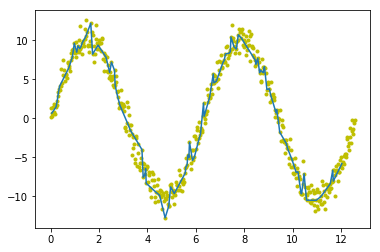

In [48]:
plt.scatter(xs,ys, c='y', marker='.')
plt.plot(min_max_xs, min_max_ys)

#### The new algorithm: find a regression line between each pair of these points

In [49]:
index_array = [list(xs).index(x) for x in xs if x in min_max_xs ]

In [50]:
index_array

[2,
 9,
 11,
 12,
 13,
 15,
 30,
 36,
 39,
 43,
 45,
 48,
 50,
 52,
 54,
 56,
 58,
 66,
 69,
 78,
 91,
 97,
 100,
 105,
 106,
 110,
 114,
 126,
 131,
 150,
 151,
 152,
 155,
 156,
 157,
 173,
 179,
 188,
 194,
 197,
 203,
 221,
 222,
 224,
 225,
 226,
 227,
 228,
 233,
 236,
 244,
 246,
 251,
 252,
 261,
 267,
 268,
 272,
 283,
 285,
 287,
 293,
 295,
 296,
 301,
 305,
 308,
 313,
 336,
 337,
 340,
 343,
 344,
 349,
 350,
 351,
 355,
 359,
 361,
 370,
 371,
 374,
 376,
 387,
 389,
 396,
 403,
 406,
 411,
 412,
 416,
 418,
 420,
 436,
 444,
 459,
 463,
 464,
 478]

##### The function to find the linear regression coefficients    

In [51]:
def lin_reg(xs,ys):
    """Returns a and b for the line y = a + bx"""
    sum_x = sum(xs)
    sum_y = sum(ys)
    sum_x2 = sum(xs**2)
    sum_xy = sum(xs*ys)
    n=len(xs)
    b = (sum_xy-sum_y)/(sum_x2-sum_x)
    return (sum_y-b*sum_x)/n, b 

In [52]:
# To be run only once!!
index_array = [0] + index_array

In [53]:
ys_regs = []
xs_regs = []
for i in range(len(index_array)-1):
    xs_part = xs[index_array[i]:index_array[i+1]+1] # inclusive
    ys_part = ys[index_array[i]:index_array[i+1]+1]
    a, b = lin_reg(xs_part, ys_part)
    ys_reg = a + b*xs_part # the regression line
    ys_regs += list(ys_reg) # obtaining a flat y list
    xs_regs += list(xs_part)

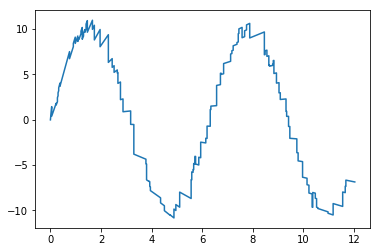

In [54]:
plt.plot(xs_regs, ys_regs)

In [55]:
ys_regs = np.array(ys_regs)